## Lab 7 (March 14):
### Tidy Data

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>

  Today, we are going to look at:   
 - [Pivoting (Gatheing and Spreading columns)]()
 - [Separate and Unite dplyr verbs]()

 






<br><br>
> ## Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [32]:
library(tidyverse)       
options(repr.plot.width=10, repr.plot.height=8)    ## Set the dimension of all plots 

---

<br> <br>


## **Introduction:**   

As data scientists, we need data to be tidy for our analyses. In tidy data:
- Every column is a variable.
- Every row is an observation.
- Every cell is a single value.  


 However, data could be messy because:
- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.   


In this discussion, we will look at how to use tools from `dplyr` from `tidyverse` to resolve the aforementioned problems.
<br><br>    





## **(1) Column headers are values, not variable names (Pivot Longer - gathering columns).**
Sometimes, data is messy in that variables form both the rows and columns, and column headers are values, not variable names. Let's look at the example below: 

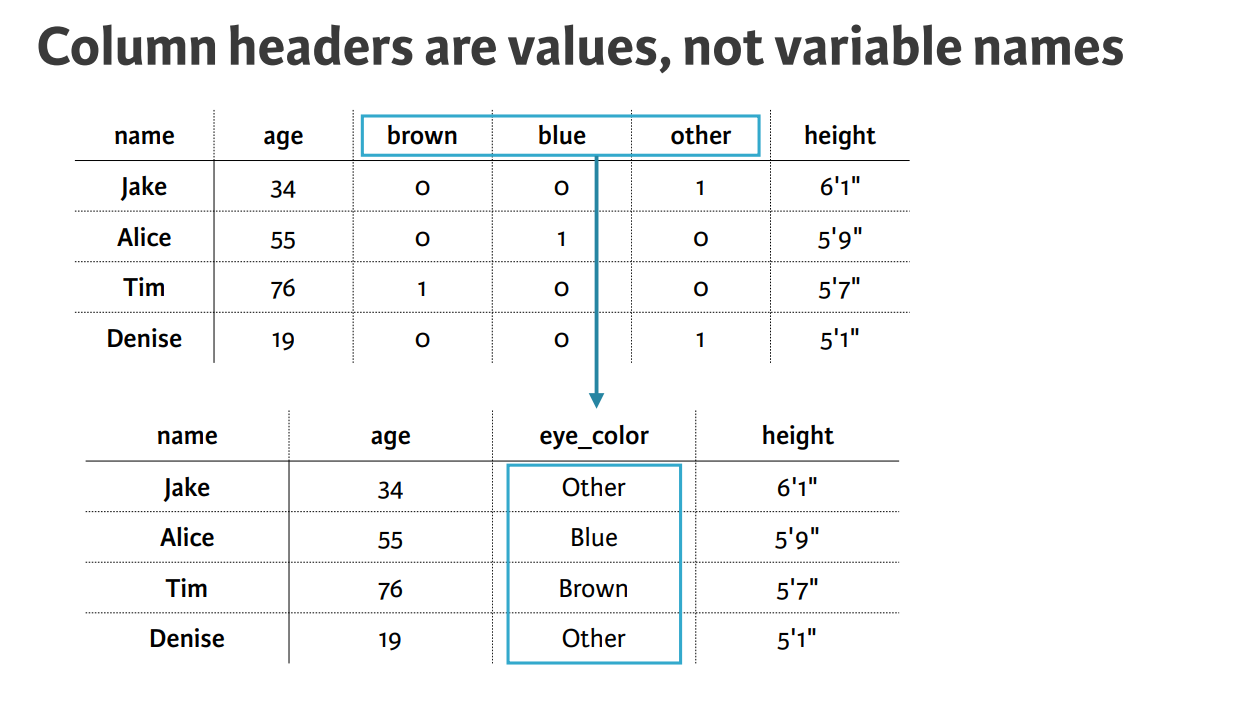

[*Source*: DataCamp]


<br>  
How do we resolve this? By "making" the table longer than wider using
`pivot_longer`:

````markdown
pivot_longer(
  data,
  cols,  ## the colums to gather
  names_to = "name", ## what name do you want to give to the "gathered" variable
  values_to = "value", ## what name do you want to give to the values of the "gathered" variable
  values_drop_na = FALSE,
  ...
)
````


## **Example 1.1**

In [33]:
## Inspect the religion-income data
relig_income


religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Agnostic,27,34,60,81,76,137,122,109,84,96
Atheist,12,27,37,52,35,70,73,59,74,76
Buddhist,27,21,30,34,33,58,62,39,53,54
Catholic,418,617,732,670,638,1116,949,792,633,1489
Don’t know/refused,15,14,15,11,10,35,21,17,18,116
Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
Hindu,1,9,7,9,11,34,47,48,54,37
Historically Black Prot,228,244,236,238,197,223,131,81,78,339
Jehovah's Witness,20,27,24,24,21,30,15,11,6,37


**Question 🤔:** What problem do you identify with this data?

**Answer 😀:** Column headers aside from `religion` represent values of a variable and not individual columns.

In [34]:
## Gathering the appropriate colums to obtain a longer table
relig_income %>% 
  pivot_longer(cols = -religion, names_to = "income", values_to = "counts") %>%
  print()


# A tibble: 180 × 3
   religion income             counts
   <chr>    <chr>               <dbl>
 1 Agnostic <$10k                  27
 2 Agnostic $10-20k                34
 3 Agnostic $20-30k                60
 4 Agnostic $30-40k                81
 5 Agnostic $40-50k                76
 6 Agnostic $50-75k               137
 7 Agnostic $75-100k              122
 8 Agnostic $100-150k             109
 9 Agnostic >150k                  84
10 Agnostic Don't know/refused     96
# … with 170 more rows


**Accomplishment 🏆:**

<ul>
  <li>Every column is a variable. &nbsp &nbsp &nbsp✅</li>
  <li>Every row is an observation. &nbsp ✅</li>
  <li>Every cell is a single value. &nbsp &nbsp &nbsp✅</li>
</ul>    

<br>  
**Challenge 1:** Identify the problem with the data below, based on what we have covered so far. How will you fix this problem?   <br>   
**_NB:_** _This dataset comes from the World Health Organisation, and records the counts of confirmed tuberculosis cases by country, year, and demographic group. The demographic groups are broken down by sex (`m`, `f`) and age (0-14, 15-25, 25-34, 35-44, 45-54, 55-64, unknown)._    
_Thus, `m014` for instance refers to male aged 0-14_

In [35]:
## Import and inspect data
path_to_file <- "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab7_data/who_tb_data.txt"
who_tb_dat   <- read_tsv(file = path_to_file, 
                         show_col_types = FALSE) ## hides warning message
slice(who_tb_dat, 16:24)                         

country,iso2,year,m014,m1524,m2534,m3544,m4554,m5564,m65,f014,f1524,f2534,f3544,f4554,f5564,f65,avg_weight_kilos/height2_meters
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Afghanistan,AF,1995,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,28.44/1.6
Afghanistan,AF,1996,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,104.27/3.33
Afghanistan,AF,1997,0,10,6,3,5,2,0,5,38,36,14,8,0,1,20.18/1.39
Afghanistan,AF,1998,30,129,128,90,89,64,41,45,350,419,194,118,61,20,236.77/1.62
Afghanistan,AF,1999,8,55,55,47,34,21,8,25,139,160,110,50,25,8,86.43/1.87
Afghanistan,AF,2000,52,228,183,149,129,94,80,93,414,565,339,205,99,36,11.65/0.19
Afghanistan,AF,2001,129,379,349,274,204,139,103,146,799,888,586,375,179,89,92.42/1.07
Afghanistan,AF,2002,90,476,481,368,246,241,189,192,1119,1251,792,526,320,218,72.8/0.01
Afghanistan,AF,2003,127,511,436,284,256,288,203,245,1152,1287,814,462,305,158,112.8/0.32


In [36]:
## Your code here
tb_dat_2 <- pivot_longer(data = who_tb_dat,
                         cols = !c(country, iso2, year, `avg_weight_kilos/height2_meters`),
                         names_to = "demography",
                         values_to = "counts",
                         values_drop_na = TRUE)
 head(tb_dat_2)                        


country,iso2,year,avg_weight_kilos/height2_meters,demography,counts
<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Afghanistan,AF,1997,20.18/1.39,m014,0
Afghanistan,AF,1997,20.18/1.39,m1524,10
Afghanistan,AF,1997,20.18/1.39,m2534,6
Afghanistan,AF,1997,20.18/1.39,m3544,3
Afghanistan,AF,1997,20.18/1.39,m4554,5
Afghanistan,AF,1997,20.18/1.39,m5564,2


<br><br>
## **(2) Multiple variables are stored in one column (Separate & Unite)** 

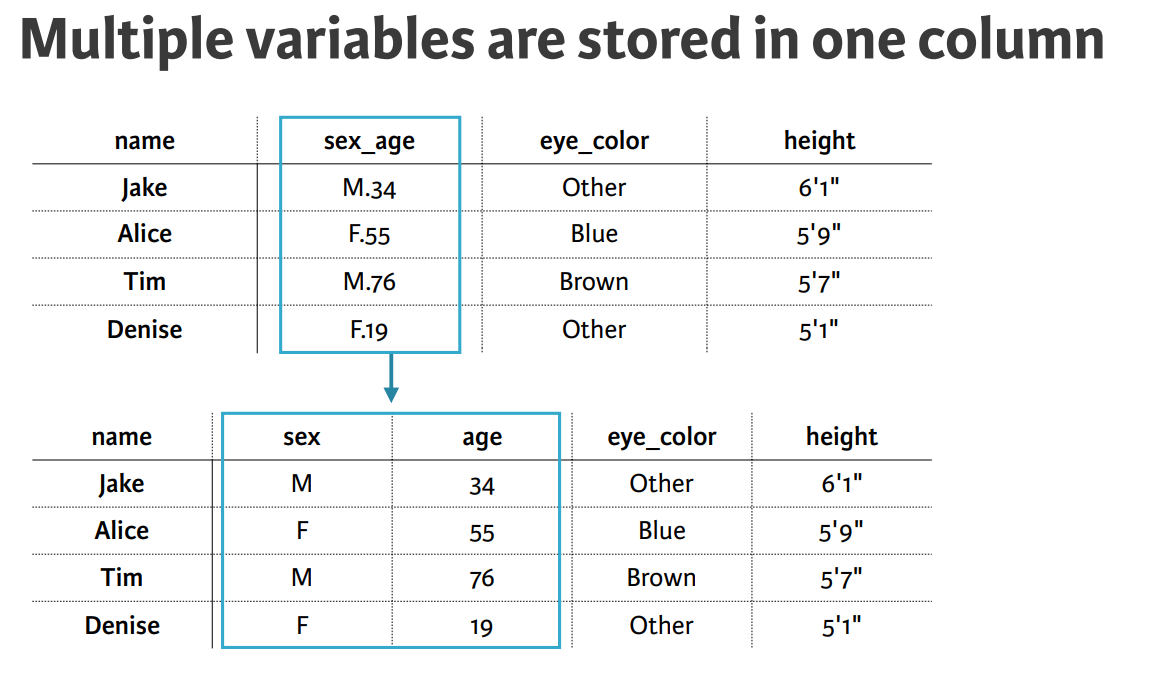

[_Source:_ DataCamp]

## **2.1 Separate**
We may have observed from the result to the challenge above that, two columns (sex and age) has been stored in one column. This nullifies our requirements for a tidy data and thus needs to be fixed!

We use the `separate` verb:
````markdown
separate(
  data,
  col, ## column to separate
  into, ## new column names
  sep = "", ## what criteria? could be character or by numeric position
  remove = TRUE, ## remove old column?
  convert = FALSE, ## convert to appropriate data type?
  ...
)
````

## **Example 2.1.1**
The pets data below has a `group` column indicating the pet class and sex, seperated by `/`. How will we split this column?

In [37]:
## Import and inspect data
path_to_file <- "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab7_data/pets_union_c.txt"
pet_char     <- read_tsv(file = path_to_file, 
                         show_col_types = FALSE) ## hides warning message

head(pet_char)                         

name,age,weight,group
<chr>,<dbl>,<dbl>,<chr>
Rex,15,3.1,other/m
Izzy,10,14.8,cat/m
Bruno,9,7.7,dog/m
Chase,11,16.6,other/f
Benny,8,12.0,dog/m
Zoey,3,6.6,other/m


In [38]:
## Split group column into class and sex
pets_char <- pet_char %>% 
        separate(col = group, into = c("class", "sex"), sep = "/")
head(pets_char)        

name,age,weight,class,sex
<chr>,<dbl>,<dbl>,<chr>,<chr>
Rex,15,3.1,other,m
Izzy,10,14.8,cat,m
Bruno,9,7.7,dog,m
Chase,11,16.6,other,f
Benny,8,12.0,dog,m
Zoey,3,6.6,other,m


## **Example 2.1.2**
Using a variant of this data, we split `year_acquired` into `century` and `year`. Note that there is no separater here so we will separate by numeric position:

In [39]:
## Import and inspect data
path_to_file <- "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab7_data/pets_union_n.txt"
pet_num     <- read_tsv(file = path_to_file, 
                         show_col_types = FALSE) ## hides warning message

head(pet_num) 

name,age,weight,class,year_acquired
<chr>,<dbl>,<dbl>,<chr>,<dbl>
Rex,15,3.1,other,2003
Izzy,10,14.8,cat,2003
Bruno,9,7.7,dog,1999
Chase,11,16.6,other,2000
Benny,8,12.0,dog,2007
Zoey,3,6.6,other,1998


In [40]:
## Split year_acquired column into century and year
pets <- pet_num %>% 
        separate(col = year_acquired, into = c("century", "year"), sep = 2, convert = T)
head(pets) 

name,age,weight,class,century,year
<chr>,<dbl>,<dbl>,<chr>,<int>,<int>
Rex,15,3.1,other,20,3
Izzy,10,14.8,cat,20,3
Bruno,9,7.7,dog,19,99
Chase,11,16.6,other,20,0
Benny,8,12.0,dog,20,7
Zoey,3,6.6,other,19,98


<br><br>
### **2.2 Unite**  
Sometimes, for the purpose of data compression, it becomes necessary to unite two or more columns into a single column. We use the `unite` verb to accomplish such task:

````markdown
unite(data,
     col,  ## new inified column name 
     ...,   ## columns to unite, seperated by commas
     sep = "", ## charater to unite on. default is "_" 
     remove = TRUE, ## remove old columns?
     na.rm = FALSE  ## remove NAs?
     )
````

In [41]:
## Let's unite the class-sex columns into group, separating by hyphen
pets_union <- pets_char %>%
             unite(col = group, class, sex, sep = "-")
head(pets_union)             

name,age,weight,group
<chr>,<dbl>,<dbl>,<chr>
Rex,15,3.1,other-m
Izzy,10,14.8,cat-m
Bruno,9,7.7,dog-m
Chase,11,16.6,other-f
Benny,8,12.0,dog-m
Zoey,3,6.6,other-m


<br><br>
**Challenge 2:** Proceed with challenge 1. In a single dplyr statement using pipes (`%>%`):
- now, split the demographics group column into `gender` and `age`
- similarly, split the `avg_weight/height2` column into `avg_weight` and `avg_height` respectively
- BMI (Body Mass Index is computed as weight divided by height squared. Create a new column `BMI` from the most recently split columns
- This is an exercise to be done outside of the lab. Search for the BMI classification online and create a new column which classifies each row as `underweight`, `Normal Weight`, `overweight`, `Obese` etc using the newly computed `BMI` column.

In [42]:
attach(tb_dat_2)

The following objects are masked from tb_dat_2 (pos = 4):

    avg_weight_kilos/height2_meters, country, counts, demography, iso2,
    year




In [43]:

## Your code here
tb_dat_3 <- tb_dat_2 %>% 
             separate(col = demography, into = c("gender", "age"), sep = 1) %>%
             separate(col = `avg_weight_kilos/height2_meters`, into = c("avg_weight", "avg_height"), sep = "/", convert = TRUE) %>%
             mutate(BMI = avg_weight/(avg_height^2)) %>%
             mutate(class = case_when(
                 BMI < 18.5 ~ "underweight",
                 BMI >= 18.5 & BMI <25 ~ "normal weight",
                 BMI >= 25 & BMI < 30 ~ "overweight",
                 TRUE ~ "obese")                     ## Centers for Disease Control and Prevention (CDC)
             ) 
head(tb_dat_3)             

country,iso2,year,avg_weight,avg_height,gender,age,counts,BMI,class
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Afghanistan,AF,1997,20.18,1.39,m,014,0,10.44459,underweight
Afghanistan,AF,1997,20.18,1.39,m,1524,10,10.44459,underweight
Afghanistan,AF,1997,20.18,1.39,m,2534,6,10.44459,underweight
Afghanistan,AF,1997,20.18,1.39,m,3544,3,10.44459,underweight
Afghanistan,AF,1997,20.18,1.39,m,4554,5,10.44459,underweight
Afghanistan,AF,1997,20.18,1.39,m,5564,2,10.44459,underweight


<br><br>
## **(3) Variables are stored in both rows and columns. (Pivot Wider)** 
Data becomes messy when variables are store in both row and columns. Simply put, this is a problem of having values of a column representing column names. Look at the image below:

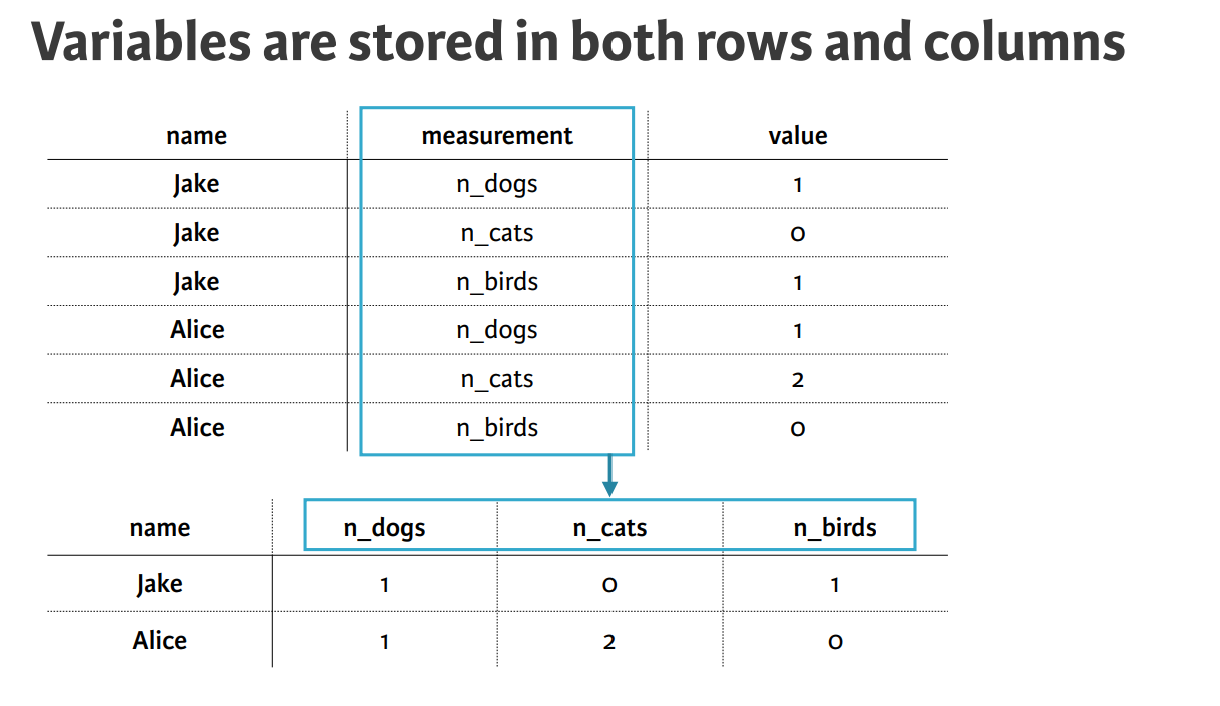

[_Source_: DataCamp]

To solve this problem, we widen the data to make all those column values become independent column names, using `pivot_wider`:

````markdown
pivot_wider(
  data,
  names_from = name,  ## column whose values become independent columns
  values_from = value, ## the column representing the value to be used
  ...
)
````

#### **Example 3.1**
Let's load the daily weather data from the Global Historical Climatology Network for one weather station (MX17004) in Mexico for five months in 2010

In [44]:
## Read the data and inpect
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab7_data/weather.txt"
Mex_weather = read_tsv(file = file_path, 
                         show_col_types = FALSE) ## hides warning message
head(Mex_weather)

id,year,month,element,d1,d2,d3,d4,d5,d6,⋯,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MX17004,2010,1,tmax,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,27.8,NA
MX17004,2010,1,tmin,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,14.5,NA
MX17004,2010,2,tmax,NA,27.3,24.1,NA,NA,NA,⋯,NA,29.9,NA,NA,NA,NA,NA,NA,NA,NA
MX17004,2010,2,tmin,NA,14.4,14.4,NA,NA,NA,⋯,NA,10.7,NA,NA,NA,NA,NA,NA,NA,NA
MX17004,2010,3,tmax,NA,NA,NA,NA,32.1,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
MX17004,2010,3,tmin,NA,NA,NA,NA,14.2,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**Question 🤔:** What problem do you identify with this data?

**Answer 😀:**
- Column headers `d1` through `d31` represent values of a variable (say `days`) and not individual columns. We could convert it to a longer format using `pivot_longer`.
- The column `element` whose values are `tmax` and `tmin` represent one record or observation (see that `month`is repeated for each observation) and should be fixed by converting this column to a wide format using `pivot_wider`.
- We see NAs in the data which should be dealt with

**(i) Gathering column names**






In [45]:
## Gather column names and remove NAs
weather <-  Mex_weather %>% 
  pivot_longer(
    cols = d1:d31, 
    names_to = "days", 
    values_to = "temperature", 
    values_drop_na = TRUE
  )

head(weather) 

id,year,month,element,days,temperature
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
MX17004,2010,1,tmax,d30,27.8
MX17004,2010,1,tmin,d30,14.5
MX17004,2010,2,tmax,d2,27.3
MX17004,2010,2,tmax,d3,24.1
MX17004,2010,2,tmax,d11,29.7
MX17004,2010,2,tmax,d23,29.9


**(ii) Converting column values to individual columns**

In [46]:
weather2 <- weather %>% 
            pivot_wider(names_from = element, values_from = temperature)
head(weather2)            

id,year,month,days,tmax,tmin
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
MX17004,2010,1,d30,27.8,14.5
MX17004,2010,2,d2,27.3,14.4
MX17004,2010,2,d3,24.1,14.4
MX17004,2010,2,d11,29.7,13.4
MX17004,2010,2,d23,29.9,10.7
MX17004,2010,3,d5,32.1,14.2


**(iii) Fixing the day column**

In [47]:
## (1) Option A
# - Seperate and remove column
weather3a <- weather2 %>% 
             separate(col = days, into = c("d", "day"), sep = 1, convert = T) %>%
             mutate(d = NULL)
head(weather3a)             

id,year,month,day,tmax,tmin
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
MX17004,2010,1,30,27.8,14.5
MX17004,2010,2,2,27.3,14.4
MX17004,2010,2,3,24.1,14.4
MX17004,2010,2,11,29.7,13.4
MX17004,2010,2,23,29.9,10.7
MX17004,2010,3,5,32.1,14.2


In [48]:
## (2) Option B
# - Seperate and remove column
weather3b <- weather2 %>% 
             mutate(day = str_replace(string = days,
                                      pattern = "d",
                                      replacement = "")
                                      ) %>%
             mutate(days = NULL)
head(weather3b)   

id,year,month,tmax,tmin,day
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
MX17004,2010,1,27.8,14.5,30
MX17004,2010,2,27.3,14.4,2
MX17004,2010,2,24.1,14.4,3
MX17004,2010,2,29.7,13.4,11
MX17004,2010,2,29.9,10.7,23
MX17004,2010,3,32.1,14.2,5


**Challenge 3:** Read the census data (census.txt) found [here](https://github.com/bosafoagyare/web-academic/tree/master/content/courses/stats306-W22/Lab-Notes/lab7_data) and tidy the data. _[Hint: Convert from long format to wide format]_

In [49]:
## Your code here

## Read the data and inpect
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab7_data/census.txt"
census = read_tsv(file = file_path, 
                         show_col_types = FALSE) ## hides warning message
head(census, 10)

YEAR,month,type,amount
<dbl>,<chr>,<chr>,<dbl>
1992,JAN,MED,146913
1992,FEB,MED,147270
1992,MAR,MED,146831
1992,APR,MED,148082
1992,MAY,MED,149015
1992,JUN,MED,149821
1992,JUL,MED,150809
1992,AUG,MED,151064
1992,SEP,MED,152595


In [50]:
## Make the TYPE column wider than longer
census2 <- census %>% 
            pivot_wider(names_from = type, values_from = amount)
head(census2) 

YEAR,month,MED,LOW,HIGH
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1992,JAN,146913,138283.1,148180.5
1992,FEB,147270,139097.8,150315.3
1992,MAR,146831,139707.8,149089.4
1992,APR,148082,146174.1,157623.9
1992,MAY,149015,144659.5,155522.7
1992,JUN,149821,140761.8,158115.4


<br>  

## **(4) Multiple types of observational units are stored in the same table.**

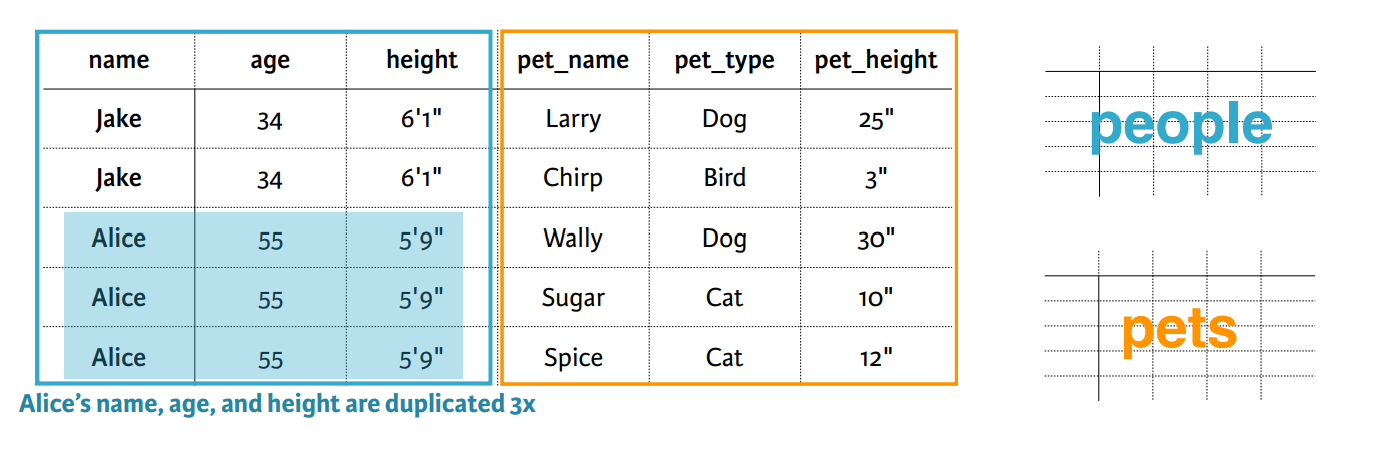

[_Source:_ DataCamp]

<br><br>
# **Exercise**
Complete the following task:
## Messy Weather Data
- Import the `weather_messy.txt` data from [here](https://github.com/bosafoagyare/web-academic/blob/master/content/courses/stats306-W22/Lab-Notes/lab7_data/weather_messy.txt)
- List all problems you identify with this data.
- This is a very messy data. How would you use tools from this lab and lecture to clean and resolve all the aforementioned problem to yield a cleaned data?




In [51]:
## your code here

## Read the data
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab7_data/weather_messy.txt"
weather_messy = read_tsv(file = file_path, 
                         show_col_types = FALSE) ## hides warning message
head(weather_messy, 10)

tail(weather_messy, 10)

X,year,month,measure,X1,X2,X3,X4,X5,X6,⋯,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2014,12,Max.TemperatureF,64,42,51,43,42,45,⋯,44,47,46,59,50,52,52,41,30,30
2,2014,12,Mean.TemperatureF,52,38,44,37,34,42,⋯,39,45,44,52,44,45,46,36,26,25
3,2014,12,Min.TemperatureF,39,33,37,30,26,38,⋯,33,42,41,44,37,38,40,30,22,20
4,2014,12,Max.Dew.PointF,46,40,49,24,37,45,⋯,39,45,46,58,31,34,42,26,10,8
5,2014,12,MeanDew.PointF,40,27,42,21,25,40,⋯,34,42,44,43,29,31,35,20,4,5
6,2014,12,Min.DewpointF,26,17,24,13,12,36,⋯,25,37,41,29,28,29,27,10,-6,1
7,2014,12,Max.Humidity,74,92,100,69,85,100,⋯,89,100,100,100,70,70,76,64,50,57
8,2014,12,Mean.Humidity,63,72,79,54,66,93,⋯,79,91,98,75,60,60,65,51,38,44
9,2014,12,Min.Humidity,52,51,57,39,47,85,⋯,69,82,96,49,49,50,53,37,26,31


X,year,month,measure,X1,X2,X3,X4,X5,X6,⋯,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
277,2015,12,Max.VisibilityMiles,10,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
278,2015,12,Mean.VisibilityMiles,8,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
279,2015,12,Min.VisibilityMiles,1,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
280,2015,12,Max.Wind.SpeedMPH,15,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
281,2015,12,Mean.Wind.SpeedMPH,6,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
282,2015,12,Max.Gust.SpeedMPH,17,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
283,2015,12,PrecipitationIn,0.14,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
284,2015,12,CloudCover,7,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
285,2015,12,Events,Rain,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


**(1) Variables `X1` through `X31` should be gathered as a single column; we also wish to drop the NAs**

In [52]:
weather_1 <- weather_messy %>%
             pivot_longer(cols = X1:X31, names_to = "days", values_to = "counts", values_drop_na = TRUE)
head(weather_1)

X,year,month,measure,days,counts
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,2014,12,Max.TemperatureF,X1,64
1,2014,12,Max.TemperatureF,X2,42
1,2014,12,Max.TemperatureF,X3,51
1,2014,12,Max.TemperatureF,X4,43
1,2014,12,Max.TemperatureF,X5,42
1,2014,12,Max.TemperatureF,X6,45


**(2) The first column (`X`) is redundant**

In [53]:
weather_2 <- mutate(weather_1, X = NULL)
head(weather_1)

X,year,month,measure,days,counts
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,2014,12,Max.TemperatureF,X1,64
1,2014,12,Max.TemperatureF,X2,42
1,2014,12,Max.TemperatureF,X3,51
1,2014,12,Max.TemperatureF,X4,43
1,2014,12,Max.TemperatureF,X5,42
1,2014,12,Max.TemperatureF,X6,45


**(3) The values of column `measure` should be individual columns (variables are stored in both rows and columns)**

In [54]:
## This should be columns and not values
weather_2 %>% select(measure)%>% unique

measure
<chr>
Max.TemperatureF
Mean.TemperatureF
Min.TemperatureF
Max.Dew.PointF
MeanDew.PointF
Min.DewpointF
Max.Humidity
Mean.Humidity
Min.Humidity


In [55]:
## We use pivot_wider to make them wide_format (turn them into columns)
weather_3 <- weather_2%>%
             pivot_wider(names_from = measure, values_from = counts)
head(weather_3, 20)
tail(weather_3, 20)

year,month,days,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,⋯,Max.VisibilityMiles,Mean.VisibilityMiles,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2014,12,X1,64,52,39,46,40,26,74,⋯,10,10,10,22,13,29,0.01,6,Rain,268
2014,12,X2,42,38,33,40,27,17,92,⋯,10,8,2,24,15,29,0.10,7,Rain-Snow,62
2014,12,X3,51,44,37,49,42,24,100,⋯,10,5,1,29,12,38,0.44,8,Rain,254
2014,12,X4,43,37,30,24,21,13,69,⋯,10,10,10,25,12,33,0.00,3,NA,292
2014,12,X5,42,34,26,37,25,12,85,⋯,10,10,5,22,10,26,0.11,5,Rain,61
2014,12,X6,45,42,38,45,40,36,100,⋯,10,4,0,22,8,25,1.09,8,Rain,313
2014,12,X7,38,30,21,36,20,-3,92,⋯,10,10,5,25,15,32,0.13,6,Rain,350
2014,12,X8,29,24,18,28,16,3,92,⋯,10,8,2,21,13,28,0.03,8,Snow,354
2014,12,X9,49,39,29,49,41,28,100,⋯,10,2,1,38,20,52,2.90,8,Rain,38


year,month,days,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,⋯,Max.VisibilityMiles,Mean.VisibilityMiles,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2015,11,X12,57,52,46,54,47,42,100,⋯,10,8,0,18,7,23,0.04,8,Rain,173
2015,11,X13,59,53,46,54,39,30,86,⋯,10,10,10,29,18,39,0.01,3,Rain,257
2015,11,X14,47,42,37,31,25,19,62,⋯,10,10,10,31,16,43,0.00,2,NA,279
2015,11,X15,54,46,37,35,30,25,64,⋯,10,10,10,18,10,23,0.00,6,NA,254
2015,11,X16,61,50,39,37,29,14,66,⋯,10,10,10,21,11,28,0.00,3,NA,306
2015,11,X17,45,39,33,31,26,20,76,⋯,10,10,10,14,7,17,0.00,1,NA,35
2015,11,X18,48,40,31,38,33,29,85,⋯,10,10,10,15,6,17,0.00,2,NA,158
2015,11,X19,55,49,43,50,44,39,89,⋯,10,10,10,16,9,20,T,8,Rain,132
2015,11,X20,61,53,44,58,47,26,100,⋯,10,7,2,25,13,29,0.86,6,Rain,266


**(4) Values of the `Precipitation` column has some weird `T`s and should be fixed. I will simply make the `0`s. Feel free to treat it as needed**

In [56]:
## confirmation of claim
weather_3$PrecipitationIn

[1] "0.01" "0.10" "0.44" "0.00" "0.11" "1.09" "0.13" "0.03" "2.90" "0.28"
 [11] "0.02" "T"    "T"    "0.00" "0.00" "T"    "0.43" "0.01" "0.00" "T"   
 [21] "T"    "0.05" "0.25" "0.56" "0.14" "0.00" "0.00" "0.01" "0.00" "0.00"
 [31] "0.00" "0.00" "0.00" "0.62" "0.57" "0.00" "0.02" "T"    "0.00" "0.01"
 [41] "0.00" "0.00" "0.20" "0.00" "T"    "0.12" "0.00" "0.00" "0.15" "0.00"
 [51] "0.00" "0.00" "T"    "0.00" "0.71" "0.00" "0.10" "0.95" "0.01" "T"   
 [61] "0.06" "0.05" "0.00" "0.78" "0.00" "0.00" "0.09" "T"    "0.07" "0.37"
 [71] "0.88" "0.05" "0.01" "0.03" "0.00" "0.23" "0.39" "0.00" "0.02" "0.01"
 [81] "0.06" "0.00" "0.17" "0.11" "0.00" "T"    "0.07" "0.02" "0.00" "0.00"
 [91] "0.17" "0.01" "0.26" "0.02" "T"    "0.00" "0.00" "T"    "0.00" "0.06"
[101] "0.01" "0.00" "0.00" "0.80" "0.27" "0.00" "0.14" "0.00" "0.00" "0.05"
[111] "0.09" "0.00" "0.00" "0.00" "0.04" "0.80" "0.21" "0.12" "0.00" "T"   
[121] "0.00" "0.00" "0.00" "0.03" "0.39" "0.00" "0.00" "0.03" "0.26" "0.09"
[131] "0.09" "0.00" "0.00" "0.00" "0.01" "0.00" "0.00" "0.06" "0.00" "0.00"
[141] "0.61" "0.54" "T"    "0.00" "T"    "0.00" "0.00" "0.10" "0.07" "0.00"
[151] "0.00" "0.00" "0.00" "0.00" "0.00" "0.02" "0.00" "0.00" "0.00" "0.00"
[161] "0.00" "0.00" "0.02" "0.00" "0.00" "0.00" "T"    "0.00" "0.00" "0.27"
[171] "0.00" "0.00" "T"    "0.00" "0.00" "T"    "0.00" "0.00" "T"    "0.00"
[181] "0.00" "0.91" "0.38" "0.74" "0.00" "0.00" "T"    "0.09" "0.00" "T"   
[191] "T"    "0.00" "0.00" "0.00" "T"    "0.00" "0.40" "T"    "0.00" "0.00"
[201] "0.00" "0.04" "1.72" "0.00" "0.01" "0.00" "0.00" "T"    "0.20" "1.43"
[211] "T"    "0.00" "0.50" "0.00" "0.00" "T"    "0.00" "0.00" "0.02" "T"   
[221] "0.15" "1.12" "0.00" "0.00" "0.00" "0.03" "T"    "0.00" "T"    "0.14"
[231] "T"    "T"    "T"    "0.00" "0.00" "0.01" "0.00" "T"    "0.06" "0.00"
[241] "0.00" "0.02" "0.00" "T"    "0.00" "0.00" "0.49" "0.00" "0.00" "0.00"
[251] "0.00" "0.00" "0.00" "0.83" "0.00" "0.00" "0.00" "0.08" "0.00" "0.00"
[261] "0.14" "0.00" "0.00" "0.63" "T"    "0.02" "T"    "0.00" "T"    "0.00"
[271] "0.00" "0.00" "0.00" "0.00" "0.00" "0.00" "0.01" "T"    "0.00" "0.00"
[281] "0.00" "0.20" "0.00" "0.17" "0.66" "0.01" "0.38" "0.00" "0.00" "0.00"
[291] "0.00" "0.00" "0.00" "T"    "0.00" "0.00" "0.00" "0.00" "0.00" "0.00"
[301] "0.00" "0.00" "0.04" "2.46" "T"    "0.08" "0.01" "0.00" "0.00" "0.00"
[311] "0.00" "0.00" "0.34" "0.00" "0.00" "0.00" "0.12" "0.00" "0.00" "T"   
[321] "T"    "T"    "0.00" "T"    "0.07" "T"    "0.00" "0.00" "0.03" "0.00"
[331] "0.00" "0.36" "0.73" "0.00" "0.00" "T"    "0.00" "0.00" "0.00" "0.00"
[341] "0.00" "0.00" "0.00" "0.00" "0.07" "0.54" "0.04" "0.01" "0.00" "0.00"
[351] "0.00" "0.00" "0.00" "T"    "0.86" "0.00" "0.30" "0.04" "0.00" "0.00"
[361] "0.00" "0.00" "0.21" "0.00" "0.00" "0.14"

In [57]:
## Converting to NAs
weather_4 <- weather_3 %>%
             mutate(PrecipitationIn = str_replace(string = PrecipitationIn,
                                      pattern = "T",
                                      replacement = "0"),
                                      .keep = "unused"
                                      ) 
weather_4$PrecipitationIn

[1] "0.01" "0.10" "0.44" "0.00" "0.11" "1.09" "0.13" "0.03" "2.90" "0.28"
 [11] "0.02" "0"    "0"    "0.00" "0.00" "0"    "0.43" "0.01" "0.00" "0"   
 [21] "0"    "0.05" "0.25" "0.56" "0.14" "0.00" "0.00" "0.01" "0.00" "0.00"
 [31] "0.00" "0.00" "0.00" "0.62" "0.57" "0.00" "0.02" "0"    "0.00" "0.01"
 [41] "0.00" "0.00" "0.20" "0.00" "0"    "0.12" "0.00" "0.00" "0.15" "0.00"
 [51] "0.00" "0.00" "0"    "0.00" "0.71" "0.00" "0.10" "0.95" "0.01" "0"   
 [61] "0.06" "0.05" "0.00" "0.78" "0.00" "0.00" "0.09" "0"    "0.07" "0.37"
 [71] "0.88" "0.05" "0.01" "0.03" "0.00" "0.23" "0.39" "0.00" "0.02" "0.01"
 [81] "0.06" "0.00" "0.17" "0.11" "0.00" "0"    "0.07" "0.02" "0.00" "0.00"
 [91] "0.17" "0.01" "0.26" "0.02" "0"    "0.00" "0.00" "0"    "0.00" "0.06"
[101] "0.01" "0.00" "0.00" "0.80" "0.27" "0.00" "0.14" "0.00" "0.00" "0.05"
[111] "0.09" "0.00" "0.00" "0.00" "0.04" "0.80" "0.21" "0.12" "0.00" "0"   
[121] "0.00" "0.00" "0.00" "0.03" "0.39" "0.00" "0.00" "0.03" "0.26" "0.09"
[131] "0.09" "0.00" "0.00" "0.00" "0.01" "0.00" "0.00" "0.06" "0.00" "0.00"
[141] "0.61" "0.54" "0"    "0.00" "0"    "0.00" "0.00" "0.10" "0.07" "0.00"
[151] "0.00" "0.00" "0.00" "0.00" "0.00" "0.02" "0.00" "0.00" "0.00" "0.00"
[161] "0.00" "0.00" "0.02" "0.00" "0.00" "0.00" "0"    "0.00" "0.00" "0.27"
[171] "0.00" "0.00" "0"    "0.00" "0.00" "0"    "0.00" "0.00" "0"    "0.00"
[181] "0.00" "0.91" "0.38" "0.74" "0.00" "0.00" "0"    "0.09" "0.00" "0"   
[191] "0"    "0.00" "0.00" "0.00" "0"    "0.00" "0.40" "0"    "0.00" "0.00"
[201] "0.00" "0.04" "1.72" "0.00" "0.01" "0.00" "0.00" "0"    "0.20" "1.43"
[211] "0"    "0.00" "0.50" "0.00" "0.00" "0"    "0.00" "0.00" "0.02" "0"   
[221] "0.15" "1.12" "0.00" "0.00" "0.00" "0.03" "0"    "0.00" "0"    "0.14"
[231] "0"    "0"    "0"    "0.00" "0.00" "0.01" "0.00" "0"    "0.06" "0.00"
[241] "0.00" "0.02" "0.00" "0"    "0.00" "0.00" "0.49" "0.00" "0.00" "0.00"
[251] "0.00" "0.00" "0.00" "0.83" "0.00" "0.00" "0.00" "0.08" "0.00" "0.00"
[261] "0.14" "0.00" "0.00" "0.63" "0"    "0.02" "0"    "0.00" "0"    "0.00"
[271] "0.00" "0.00" "0.00" "0.00" "0.00" "0.00" "0.01" "0"    "0.00" "0.00"
[281] "0.00" "0.20" "0.00" "0.17" "0.66" "0.01" "0.38" "0.00" "0.00" "0.00"
[291] "0.00" "0.00" "0.00" "0"    "0.00" "0.00" "0.00" "0.00" "0.00" "0.00"
[301] "0.00" "0.00" "0.04" "2.46" "0"    "0.08" "0.01" "0.00" "0.00" "0.00"
[311] "0.00" "0.00" "0.34" "0.00" "0.00" "0.00" "0.12" "0.00" "0.00" "0"   
[321] "0"    "0"    "0.00" "0"    "0.07" "0"    "0.00" "0.00" "0.03" "0.00"
[331] "0.00" "0.36" "0.73" "0.00" "0.00" "0"    "0.00" "0.00" "0.00" "0.00"
[341] "0.00" "0.00" "0.00" "0.00" "0.07" "0.54" "0.04" "0.01" "0.00" "0.00"
[351] "0.00" "0.00" "0.00" "0"    "0.86" "0.00" "0.30" "0.04" "0.00" "0.00"
[361] "0.00" "0.00" "0.21" "0.00" "0.00" "0.14"

**(4) We wish to move the `Events` column to position 4 to make more sense for readability. Next, the columns `Max.TemperatureF` through `WindDirDegrees` should be `numeric` than characters (`chr`)***

In [58]:
weather_5 <- weather_4 %>%
             select(year, month, days, Events, Max.TemperatureF:WindDirDegrees) %>%
             mutate_each(funs(as.numeric), Max.TemperatureF:WindDirDegrees)
head(weather_5)             

year,month,days,Events,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,⋯,Min.Sea.Level.PressureIn,Max.VisibilityMiles,Mean.VisibilityMiles,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,12,X1,Rain,64,52,39,46,40,26,⋯,30.01,10,10,10,22,13,29,0.01,6,268
2014,12,X2,Rain-Snow,42,38,33,40,27,17,⋯,30.40,10,8,2,24,15,29,0.10,7,62
2014,12,X3,Rain,51,44,37,49,42,24,⋯,29.87,10,5,1,29,12,38,0.44,8,254
2014,12,X4,NA,43,37,30,24,21,13,⋯,30.09,10,10,10,25,12,33,0.00,3,292
2014,12,X5,Rain,42,34,26,37,25,12,⋯,30.45,10,10,5,22,10,26,0.11,5,61
2014,12,X6,Rain,45,42,38,45,40,36,⋯,30.16,10,4,0,22,8,25,1.09,8,313


**(5) It sounds like a good idea to unite `year`, `moonth` and `days` columns to a new column `date`. We will first strip the `X` in front of the values of `days` and then convert our overall `date` column to a date object. We will use the `lubridate` package. It is okay if this is new to you**

In [59]:
#load the lubridate package

library(lubridate)
weather_6 <- weather_5 %>%
             mutate(days = str_replace(days, "X","")) %>%
             unite(date, year, month, days, sep = "-") %>%
             mutate(date = ymd(date))
head(weather_6)             


date,Events,Max.TemperatureF,Mean.TemperatureF,Min.TemperatureF,Max.Dew.PointF,MeanDew.PointF,Min.DewpointF,Max.Humidity,Mean.Humidity,⋯,Min.Sea.Level.PressureIn,Max.VisibilityMiles,Mean.VisibilityMiles,Min.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Wind.SpeedMPH,Max.Gust.SpeedMPH,PrecipitationIn,CloudCover,WindDirDegrees
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-12-01,Rain,64,52,39,46,40,26,74,63,⋯,30.01,10,10,10,22,13,29,0.01,6,268
2014-12-02,Rain-Snow,42,38,33,40,27,17,92,72,⋯,30.40,10,8,2,24,15,29,0.10,7,62
2014-12-03,Rain,51,44,37,49,42,24,100,79,⋯,29.87,10,5,1,29,12,38,0.44,8,254
2014-12-04,NA,43,37,30,24,21,13,69,54,⋯,30.09,10,10,10,25,12,33,0.00,3,292
2014-12-05,Rain,42,34,26,37,25,12,85,66,⋯,30.45,10,10,5,22,10,26,0.11,5,61
2014-12-06,Rain,45,42,38,45,40,36,100,93,⋯,30.16,10,4,0,22,8,25,1.09,8,313


**(6) Other**    
Other advanced forms of cleaning the data include:
- dealing with NAs 
- checking for outliers 
- changing the column names to more appropiate usable names etc. 
We will not do that for this exercise, but please feel free to explore.

<br><br>
Special thanks to all resources used for lab, including packages, materials from DataCamp and datasets as well as all other uncitable resources.